In [84]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 23.9 MB/s eta 0:00:00


# Treinando um classificador com o dataset Breast_Cancer

In [86]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [81]:
#baixando e separando o dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [77]:
#Treinando o modelo:
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Calculando a curva ROC

In [78]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_train_score = clf.predict_proba(X_train)[:, 1]
y_test_score = clf.predict_proba(X_test)[:, 1]

In [79]:
# calculando curva roc
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)

#área sob a curva
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

### Plotando a curva ROC

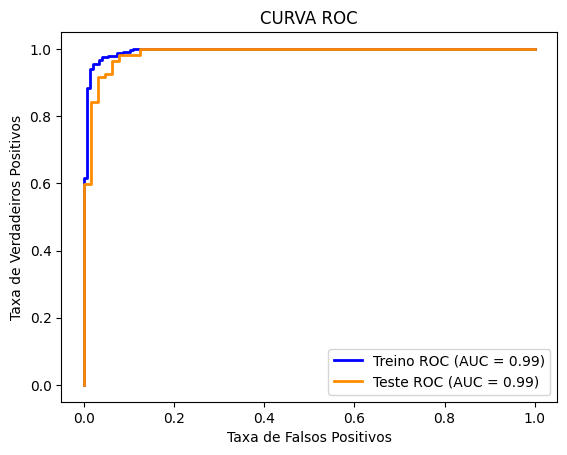

In [80]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Treino ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Teste ROC (AUC = {roc_auc_test:.2f})')
plt.legend(loc="lower right")
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.title('CURVA ROC')
plt.show()




# SHAP

In [87]:
import shap
explainer = shap.KernelExplainer(clf.predict,shap.kmeans(X_train, 10))

  0%|          | 0/171 [00:00<?, ?it/s]

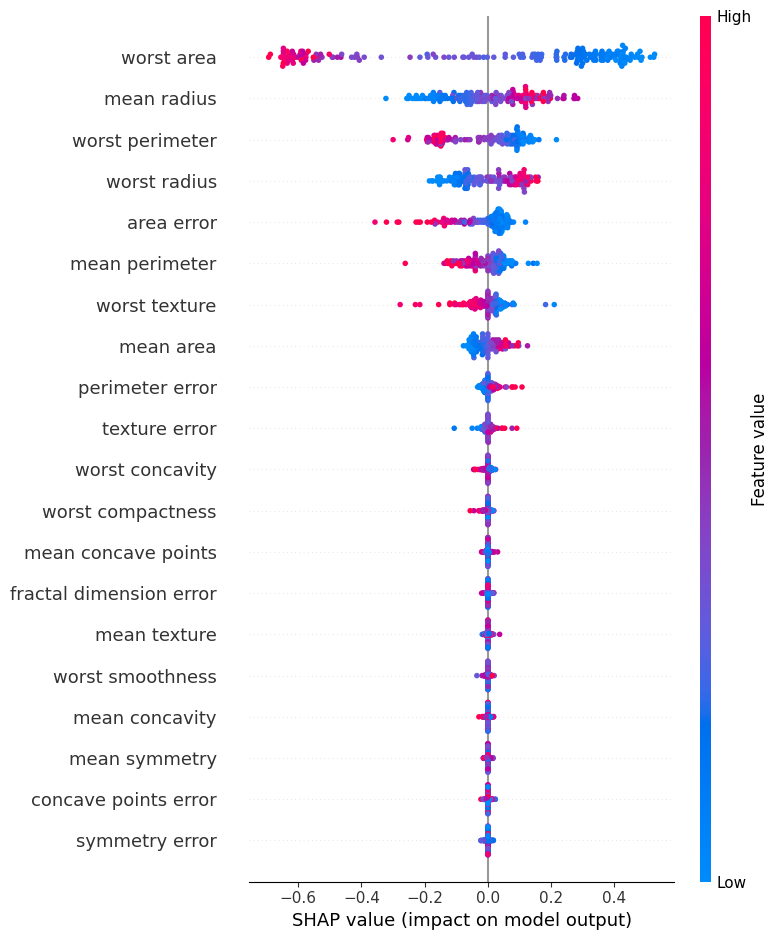

In [89]:
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values,X_test, feature_names = data['feature_names'])